## Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

 
## Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [1]:
import numpy as np
import pandas as pd

In [7]:
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [12]:
airfoil=pd.read_csv('AirfoilSelfNoise.csv')

In [13]:
airfoil.head()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [14]:
airfoil.describe

<bound method NDFrame.describe of          f  alpha       c  U_infinity     delta     SSPL
0      800    0.0  0.3048        71.3  0.002663  126.201
1     1000    0.0  0.3048        71.3  0.002663  125.201
2     1250    0.0  0.3048        71.3  0.002663  125.951
3     1600    0.0  0.3048        71.3  0.002663  127.591
4     2000    0.0  0.3048        71.3  0.002663  127.461
...    ...    ...     ...         ...       ...      ...
1498  2500   15.6  0.1016        39.6  0.052849  110.264
1499  3150   15.6  0.1016        39.6  0.052849  109.254
1500  4000   15.6  0.1016        39.6  0.052849  106.604
1501  5000   15.6  0.1016        39.6  0.052849  106.224
1502  6300   15.6  0.1016        39.6  0.052849  104.204

[1503 rows x 6 columns]>

In [15]:
airfoil.info

<bound method DataFrame.info of          f  alpha       c  U_infinity     delta     SSPL
0      800    0.0  0.3048        71.3  0.002663  126.201
1     1000    0.0  0.3048        71.3  0.002663  125.201
2     1250    0.0  0.3048        71.3  0.002663  125.951
3     1600    0.0  0.3048        71.3  0.002663  127.591
4     2000    0.0  0.3048        71.3  0.002663  127.461
...    ...    ...     ...         ...       ...      ...
1498  2500   15.6  0.1016        39.6  0.052849  110.264
1499  3150   15.6  0.1016        39.6  0.052849  109.254
1500  4000   15.6  0.1016        39.6  0.052849  106.604
1501  5000   15.6  0.1016        39.6  0.052849  106.224
1502  6300   15.6  0.1016        39.6  0.052849  104.204

[1503 rows x 6 columns]>

## Visulaizaion

<AxesSubplot:>

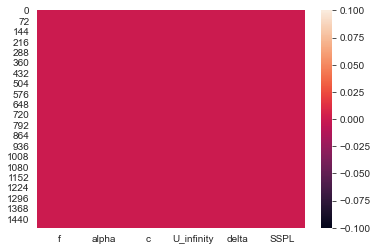

In [17]:
sns.heatmap(airfoil.isnull())

In [18]:
airfoil.columns

Index(['f', 'alpha', 'c', 'U_infinity', 'delta', 'SSPL'], dtype='object')

<AxesSubplot:xlabel='f', ylabel='SSPL'>

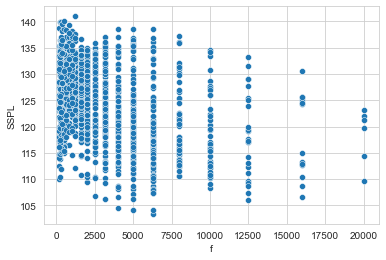

In [33]:
sns.scatterplot(x='f',y='SSPL',data=airfoil)

<AxesSubplot:>

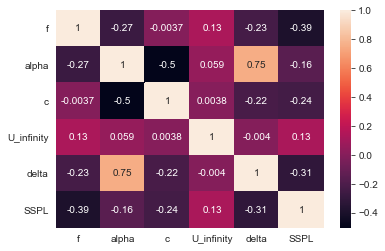

In [35]:
sns.heatmap(airfoil.corr(),annot=True)

## Preprocessing 

In [10]:
from sklearn.model_selection import train_test_split

In [19]:
X=airfoil.drop('SSPL',axis=1)

In [20]:
y=airfoil['SSPL']

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Training

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=lr.predict(X_test)

In [26]:
y_pred

array([129.69230892, 129.46048688, 130.68465399, 133.26455572,
       120.1263531 , 124.81108799, 132.49899603, 130.75287745,
       127.37898028, 127.17873779, 123.84149956, 125.18647884,
       120.72644415, 125.05634478, 124.31432597, 128.91219057,
       122.3712991 , 128.76867665, 127.24398822, 122.17498041,
       121.11349354, 128.40954557, 132.52598548, 120.71803437,
       114.746814  , 126.26856202, 126.67139114, 125.86262713,
       125.04265356, 122.42601901, 122.8867719 , 122.4077116 ,
       130.23679916, 119.42164771, 124.09424015, 130.38642793,
       125.16976318, 124.23999594, 126.98025505, 122.3248185 ,
       115.95345479, 123.83332025, 119.153543  , 133.68527125,
       123.28496417, 124.12240529, 132.66446467, 120.30567056,
       119.93436145, 129.49268626, 118.02279969, 123.39458371,
       112.55757452, 133.52368192, 122.1905048 , 120.59401409,
       123.01937483, 123.00348865, 118.74614778, 130.42965007,
       126.68867152, 119.59458892, 127.21147307, 134.64

In [27]:
lr.coef_

array([-1.20018209e-03, -4.08232248e-01, -3.55427764e+01,  9.34956888e-02,
       -1.45700394e+02])

## Evaluation

<AxesSubplot:xlabel='SSPL'>

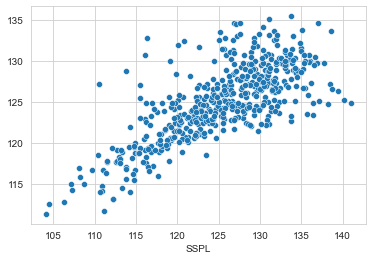

In [31]:
sns.scatterplot(x=y_test,y=y_pred)

<AxesSubplot:xlabel='SSPL', ylabel='Count'>

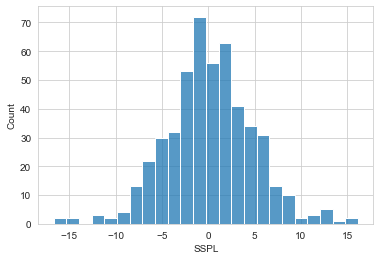

In [32]:
sns.histplot(y_test-y_pred)